# ARIMA MODEL

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [71]:
data = pd.read_csv('Ocean_1.csv')
print( data.head())
print( '\n Data Types:')
print(data.dtypes)

   S.no.  wqi  time
0      1   35    10
1      2   35    20
2      3   35    30
3      4   35    40
4      5   35    50

 Data Types:
S.no.    int64
wqi      int64
time     int64
dtype: object


In [72]:
data.index

RangeIndex(start=0, stop=50, step=1)

In [73]:
ts = data['wqi']
ts.head(10)

0    35
1    35
2    35
3    35
4    35
5    36
6    36
7    36
8    36
9    37
Name: wqi, dtype: int64

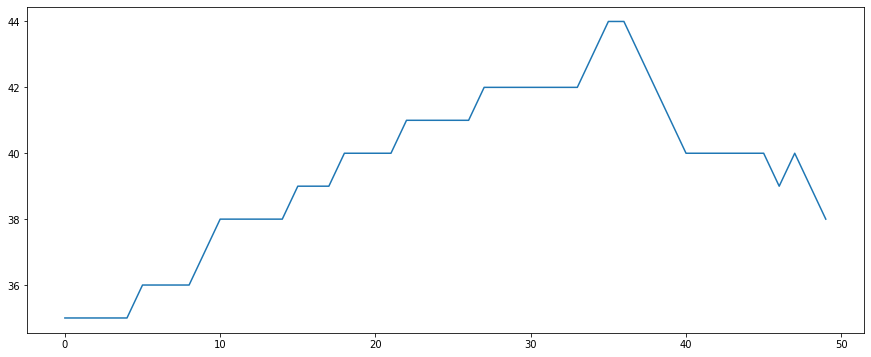

In [74]:
plt.plot(ts)

In [76]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = ts_log.rolling(12).mean()
    rolstd = ts_log.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

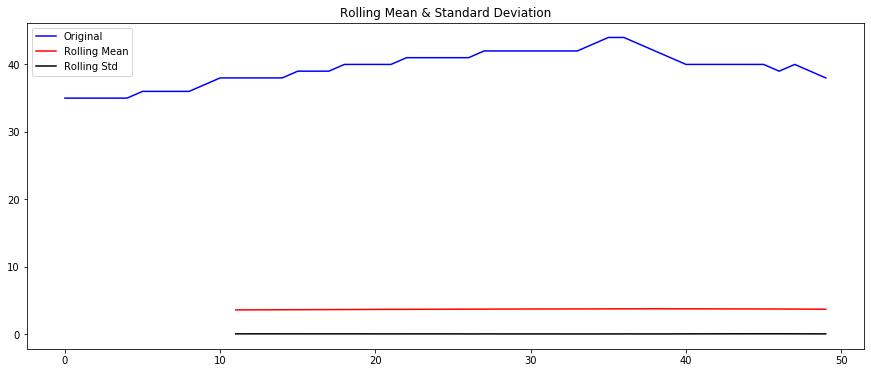

Results of Dickey-Fuller Test:
Test Statistic                 -1.801339
p-value                         0.379797
#Lags Used                      1.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [77]:
from datetime import datetime

test_stationarity(ts)



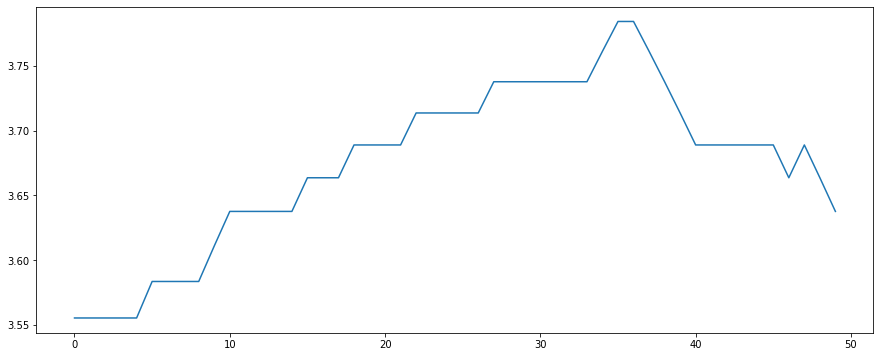

In [80]:
ts_log = np.log(ts)
plt.plot(ts_log)

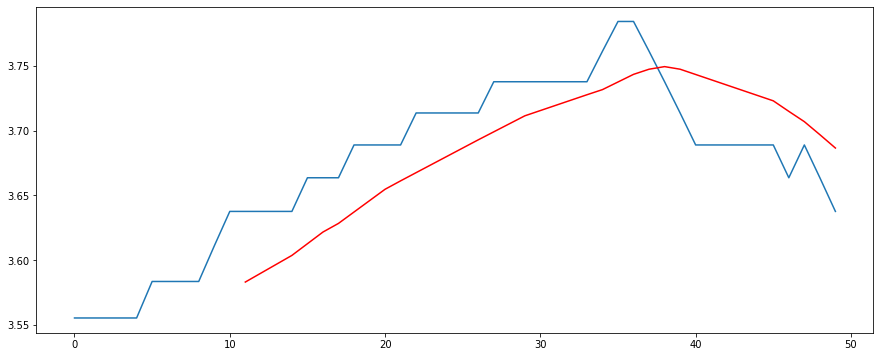

In [81]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [82]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.054511
Name: wqi, dtype: float64

In [83]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

11    0.054511
12    0.047657
13    0.040804
14    0.033951
15    0.050909
Name: wqi, dtype: float64

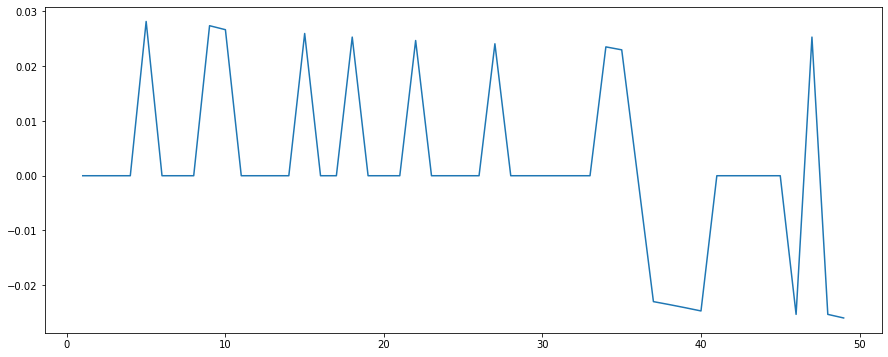

In [84]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

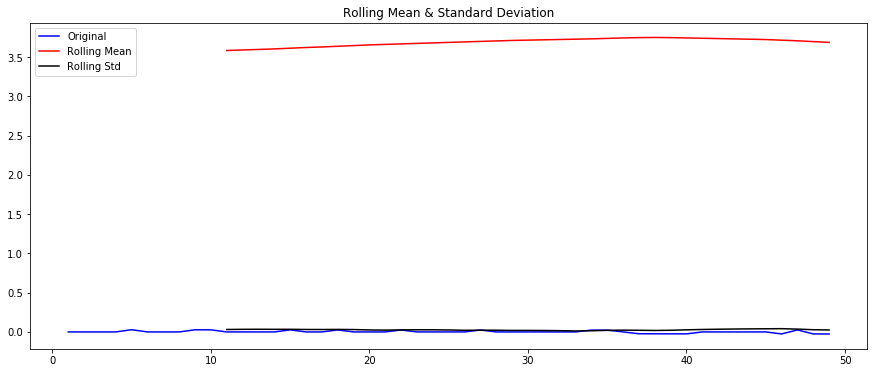

Results of Dickey-Fuller Test:
Test Statistic                 -5.204440
p-value                         0.000009
#Lags Used                      0.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [85]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

C:\Users\USER\.conda\envs\TensorFflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


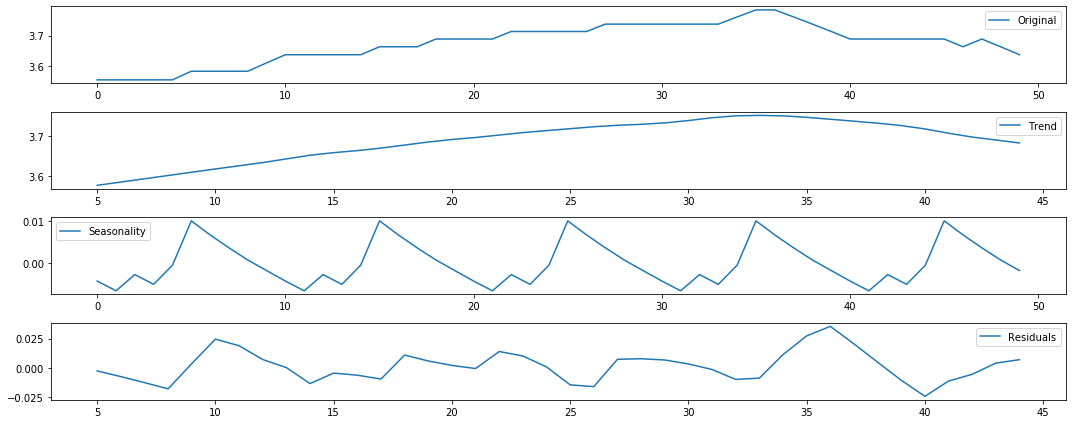

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=10)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

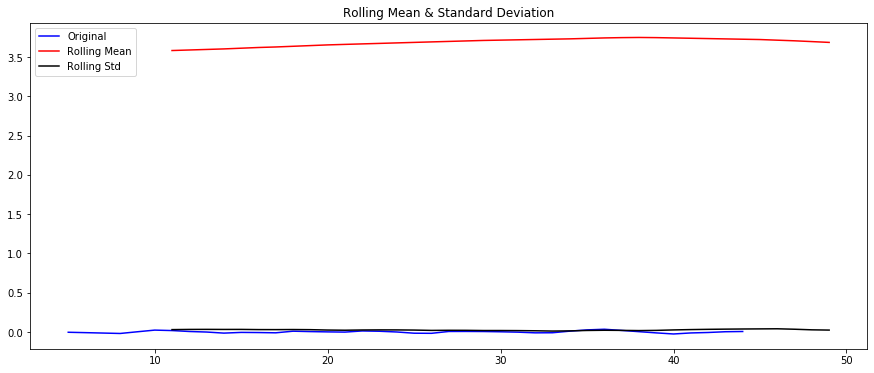

Results of Dickey-Fuller Test:
Test Statistic                 -1.344527
p-value                         0.608563
#Lags Used                     10.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [87]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


In [88]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\USER\.conda\envs\TensorFflow\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


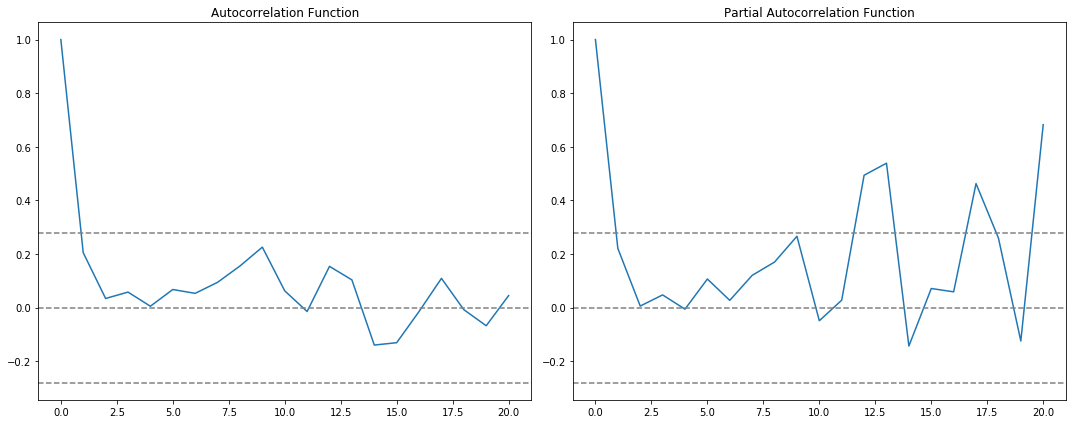

In [89]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5, 1.0, 'RSS: 0.0101')

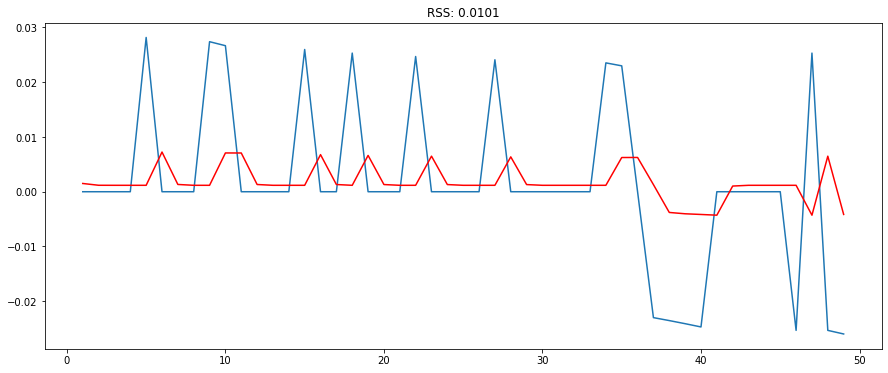

In [90]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS: 0.0098')

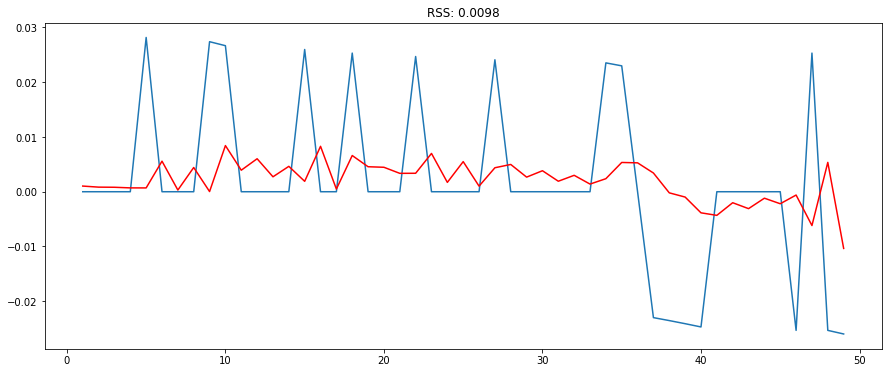

In [91]:

model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [92]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

1    0.001033
2    0.000839
3    0.000815
4    0.000703
5    0.000695
dtype: float64


In [93]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print( predictions_ARIMA_diff_cumsum.head())

1    0.001033
2    0.001873
3    0.002688
4    0.003391
5    0.004086
dtype: float64


In [94]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\USER\.conda\envs\TensorFflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0    3.555348
1    3.556381
2    3.557221
3    3.558036
4    3.558739
dtype: float64

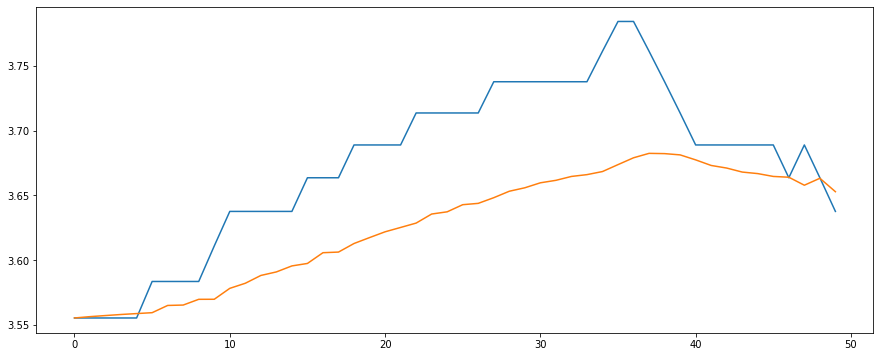

In [95]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 2.2876')

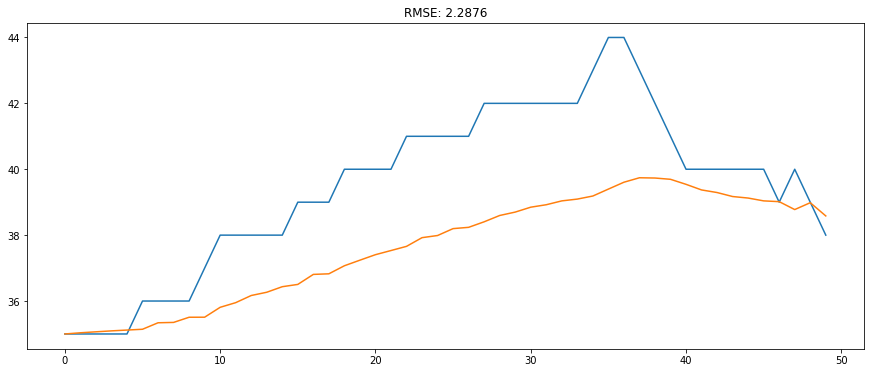

In [96]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

# Anomaly Detection

In [97]:
X_anomaly = np.array(pd.read_csv('Ocean_1.csv'))
print(X_anomaly)
X_anomaly = X_anomaly[:,1]
print(X_anomaly)

[[  1  35  10]
 [  2  35  20]
 [  3  35  30]
 [  4  35  40]
 [  5  35  50]
 [  6  36  60]
 [  7  36  70]
 [  8  36  80]
 [  9  36  90]
 [ 10  37 100]
 [ 11  38 110]
 [ 12  38 120]
 [ 13  38 130]
 [ 14  38 140]
 [ 15  38 150]
 [ 16  39 160]
 [ 17  39 170]
 [ 18  39 180]
 [ 19  40 190]
 [ 20  40 200]
 [ 21  40 210]
 [ 22  40 220]
 [ 23  41 230]
 [ 24  41 240]
 [ 25  41 250]
 [ 26  41 260]
 [ 27  41 270]
 [ 28  42 280]
 [ 29  42 290]
 [ 30  42 300]
 [ 31  42 310]
 [ 32  42 320]
 [ 33  42 330]
 [ 34  42 340]
 [ 35  43 350]
 [ 36  44 360]
 [ 37  44 370]
 [ 38  43 380]
 [ 39  42 390]
 [ 40  41 400]
 [ 41  40 410]
 [ 42  40 420]
 [ 43  40 430]
 [ 44  40 440]
 [ 45  40 450]
 [ 46  40 460]
 [ 47  39 470]
 [ 48  40 480]
 [ 49  39 490]
 [ 50  38 500]]
[35 35 35 35 35 36 36 36 36 37 38 38 38 38 38 39 39 39 40 40 40 40 41 41
 41 41 41 42 42 42 42 42 42 42 43 44 44 43 42 41 40 40 40 40 40 40 39 40
 39 38]


In [98]:
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

In [99]:
df = pd.read_csv("Ocean_1.csv")
df['wqi'].describe()
d1 = np.array(df)

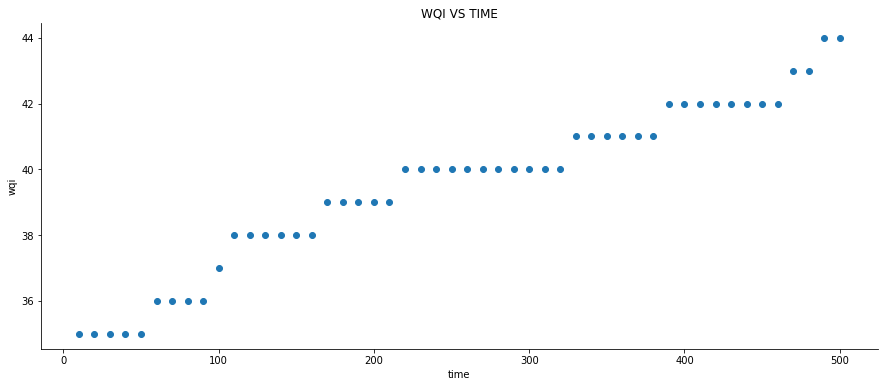

In [100]:
plt.scatter(d1[:,2], np.sort(df['wqi'].values))
plt.xlabel('time')
plt.ylabel('wqi')
plt.title("WQI VS TIME")
sns.despine()

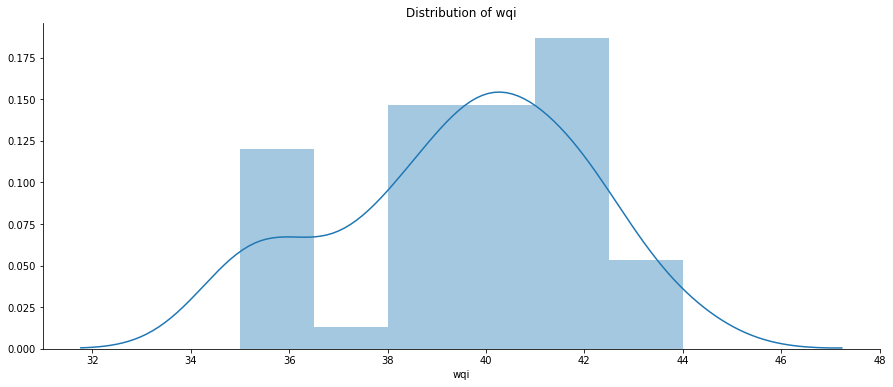

In [101]:
sns.distplot(df['wqi'])
plt.title("Distribution of wqi")
sns.despine()

In [102]:
print("Skewness: %f" % df['wqi'].skew())
print("Kurtosis: %f" % df['wqi'].kurt())

Skewness: -0.345095
Kurtosis: -0.660310


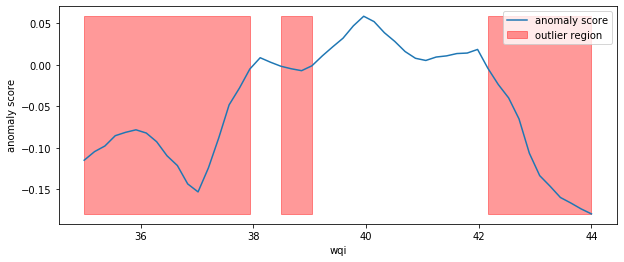

In [108]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['wqi'].values.reshape(-1, 1))
xx = np.linspace(df['wqi'].min(), df['wqi'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('wqi')
plt.show();